Machine Learning 


In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import csv 
from forex_python.converter import CurrencyRates
import requests
import matplotlib.pyplot as plt
import phik
from sklearn import linear_model


EDA 

In [243]:


doc = "/Users/josezambrano/Documents/GitHub/dsft_ene23/3_Machine_learning/entregable/boat_dataset.csv"
data = pd.read_csv(doc, encoding='latin-1')

data.head()





,Price,Category,Boat Type,Manufacturer,Model,Boat name,Type,Year Built,Condition,Length,Width,Depth,Displacement,CE Design Category,Cert Number of People,Number of Cabins,Number of beds,Hull Color,Number of Toilets,Number of Bathrooms,Number of Showers,Material,Fresh Water Cap,Holding Tank,Propulsion,Engine,Engine Performance,Fuel Capacity,Fuel Type,Engine Hours,Max Speed,Cruising Speed,Location,Advertisement Date,Number of views last 7 days,Comments,Additional Comments,Equipment
0,"CHF 3.337,-",Power Boats,Motor Yacht,Rigiflex power boats,CAP 400,NaN,new boat from stock,2017.0,as new,4.00 m,1.90 m,NaN,NaN,NaN,7.0,NaN,NaN,white,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Switzerland Â» Lake Geneva Â» VÃ©senaz,NaN,226,NaN,Possibility to arrange it with a complete luxu...,NaN
1,"EUR 3.490,-",Power Boats,Center console boat,Terhi power boats,400 C,NaN,new boat from stock,2020.0,new,4.00 m,1.50 m,NaN,150 kg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Thermoplastic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Germany Â» BÃ¶nningstedt,NaN,75,"In den Farben weiÃ oder grÃ¼n lieferbar.,,2 a...",NaN,NaN
2,"CHF 3.770,-",Power Boats,Sport Boat,Marine power boats,370 S - Aluboot,NaN,new boat from stock,NaN,NaN,3.69 m,1.42 m,0.25 m,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,Aluminium,NaN,NaN,NaN,(Permission for Lake of Constance),NaN,NaN,NaN,NaN,NaN,NaN,Switzerland Â» Lake of Zurich Â» StÃ¤fa ZH,NaN,124,NaN,The lightweight and sleek rowing boat for 4 pe...,NaN
3,"DKK 25.900,-",Power Boats,Sport Boat,Pioner power boats,10 Classic Special Edition,NaN,new boat from stock,2020.0,NaN,3.00 m,1.00 m,NaN,110 kg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Denmark Â» Svendborg,NaN,64,"MORSOM OG LETKÃRT KVALITETSBÃ D!,Nye Pioner 1...",NaN,NaN
4,"SEK 35.000,-",Power Boats,Classic,NaN,Gullholmensnipa 21,NaN,Used boat,1974.0,good,6.30 m,2.50 m,0.75 m,2'000 kg,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Inboard with Shaft,VolvoPenta MD 2002,1 x 18 HP / 13 kW,50 l,NaN,500 h,NaN,NaN,Nordsee Â» VÃ¤stra FrÃ¶lunda,04.07.2020,131,NaN,NaN,"Anchor,Battery,Bilge Pump,Bilge pump,Cockpit C..."


In [244]:
data.describe()

,Year Built,Cert Number of People,Number of Cabins,Number of beds,Number of Toilets,Number of Bathrooms,Number of Showers
count,9777.000000,3597.000000,6475.000000,6407.000000,2156.000000,463.000000,1941.000000
mean,2004.830725,9.355296,2.149035,4.345716,1.763915,1.289417,1.550747
std,16.309045,24.037107,2.145005,3.974223,2.076365,0.653360,0.930096
min,1885.000000,1.000000,-1.000000,-23.000000,1.000000,1.000000,1.000000
25%,1999.000000,7.000000,1.000000,2.000000,1.000000,1.000000,1.000000
50%,2008.000000,8.000000,2.000000,4.000000,1.000000,1.000000,1.000000
75%,2017.000000,10.000000,3.000000,6.000000,2.000000,1.000000,2.000000
max,2021.000000,1200.000000,96.000000,266.000000,84.000000,6.000000,10.000000


In [245]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10344 entries, 0 to 10343
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Price                        10344 non-null  object 
 1   Category                     10344 non-null  object 
 2   Boat Type                    10344 non-null  object 
 3   Manufacturer                 8954 non-null   object 
 4   Model                        10341 non-null  object 
 5   Boat name                    1313 non-null   object 
 6   Type                         10339 non-null  object 
 7   Year Built                   9777 non-null   float64
 8   Condition                    3375 non-null   object 
 9   Length                       10334 non-null  object 
 10  Width                        10281 non-null  object 
 11  Depth                        7234 non-null   object 
 12  Displacement                 5051 non-null   object 
 13  CE Design Catego

In [246]:
data.value_counts()

Series([], dtype: int64)

In [247]:
#Elimino las columnas que considero que no me pueden aportar mucha informacion "Category","Boat name","CE Design Category ","Fresh Water Cap"."Advertisement Date ","Number of views last 7 days","Additional Comments" 

In [248]:
columns_to_drop = ["Category", "Boat name", "CE Design Category", "Fresh Water Cap", "Advertisement Date", "Number of views last 7 days", "Additional Comments"]
data = data.drop(columns_to_drop, axis=1)

data.to_csv('your_file_path', index=False)

data.head()

,Price,Boat Type,Manufacturer,Model,Type,Year Built,Condition,Length,Width,Depth,Displacement,Cert Number of People,Number of Cabins,Number of beds,Hull Color,Number of Toilets,Number of Bathrooms,Number of Showers,Material,Holding Tank,Propulsion,Engine,Engine Performance,Fuel Capacity,Fuel Type,Engine Hours,Max Speed,Cruising Speed,Location,Comments,Equipment
0,"CHF 3.337,-",Motor Yacht,Rigiflex power boats,CAP 400,new boat from stock,2017.0,as new,4.00 m,1.90 m,NaN,NaN,7.0,NaN,NaN,white,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Switzerland Â» Lake Geneva Â» VÃ©senaz,NaN,NaN
1,"EUR 3.490,-",Center console boat,Terhi power boats,400 C,new boat from stock,2020.0,new,4.00 m,1.50 m,NaN,150 kg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Thermoplastic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Germany Â» BÃ¶nningstedt,"In den Farben weiÃ oder grÃ¼n lieferbar.,,2 a...",NaN
2,"CHF 3.770,-",Sport Boat,Marine power boats,370 S - Aluboot,new boat from stock,NaN,NaN,3.69 m,1.42 m,0.25 m,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,Aluminium,NaN,NaN,(Permission for Lake of Constance),NaN,NaN,NaN,NaN,NaN,NaN,Switzerland Â» Lake of Zurich Â» StÃ¤fa ZH,NaN,NaN
3,"DKK 25.900,-",Sport Boat,Pioner power boats,10 Classic Special Edition,new boat from stock,2020.0,NaN,3.00 m,1.00 m,NaN,110 kg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Denmark Â» Svendborg,"MORSOM OG LETKÃRT KVALITETSBÃ D!,Nye Pioner 1...",NaN
4,"SEK 35.000,-",Classic,NaN,Gullholmensnipa 21,Used boat,1974.0,good,6.30 m,2.50 m,0.75 m,2'000 kg,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,Inboard with Shaft,VolvoPenta MD 2002,1 x 18 HP / 13 kW,50 l,NaN,500 h,NaN,NaN,Nordsee Â» VÃ¤stra FrÃ¶lunda,NaN,"Anchor,Battery,Bilge Pump,Bilge pump,Cockpit C..."


In [249]:
data.describe()


,Year Built,Cert Number of People,Number of Cabins,Number of beds,Number of Toilets,Number of Bathrooms,Number of Showers
count,9777.000000,3597.000000,6475.000000,6407.000000,2156.000000,463.000000,1941.000000
mean,2004.830725,9.355296,2.149035,4.345716,1.763915,1.289417,1.550747
std,16.309045,24.037107,2.145005,3.974223,2.076365,0.653360,0.930096
min,1885.000000,1.000000,-1.000000,-23.000000,1.000000,1.000000,1.000000
25%,1999.000000,7.000000,1.000000,2.000000,1.000000,1.000000,1.000000
50%,2008.000000,8.000000,2.000000,4.000000,1.000000,1.000000,1.000000
75%,2017.000000,10.000000,3.000000,6.000000,2.000000,1.000000,2.000000
max,2021.000000,1200.000000,96.000000,266.000000,84.000000,6.000000,10.000000


In [250]:
#Separo los STR  en 2 columnas  que me indicav la la moneda y su valor para poder hacer el cambio a Euros 
#Elimino la descripcion de la ubicacion y solo me quedo con con el pais  

In [251]:

data['Value'] = data['Price'].str.extract('(\d+\.\d+|\d+)').astype(str)

data['Currency'] = data['Price'].str.extract('([A-Za-z]{3})')
data['Location'] = data['Location'].str.split().str[0]


data.head()

,Price,Boat Type,Manufacturer,Model,Type,Year Built,Condition,Length,Width,Depth,Displacement,Cert Number of People,Number of Cabins,Number of beds,Hull Color,Number of Toilets,Number of Bathrooms,Number of Showers,Material,Holding Tank,Propulsion,Engine,Engine Performance,Fuel Capacity,Fuel Type,Engine Hours,Max Speed,Cruising Speed,Location,Comments,Equipment,Value,Currency
0,"CHF 3.337,-",Motor Yacht,Rigiflex power boats,CAP 400,new boat from stock,2017.0,as new,4.00 m,1.90 m,NaN,NaN,7.0,NaN,NaN,white,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Switzerland,NaN,NaN,3.337,CHF
1,"EUR 3.490,-",Center console boat,Terhi power boats,400 C,new boat from stock,2020.0,new,4.00 m,1.50 m,NaN,150 kg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Thermoplastic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Germany,"In den Farben weiÃ oder grÃ¼n lieferbar.,,2 a...",NaN,3.490,EUR
2,"CHF 3.770,-",Sport Boat,Marine power boats,370 S - Aluboot,new boat from stock,NaN,NaN,3.69 m,1.42 m,0.25 m,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,Aluminium,NaN,NaN,(Permission for Lake of Constance),NaN,NaN,NaN,NaN,NaN,NaN,Switzerland,NaN,NaN,3.770,CHF
3,"DKK 25.900,-",Sport Boat,Pioner power boats,10 Classic Special Edition,new boat from stock,2020.0,NaN,3.00 m,1.00 m,NaN,110 kg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Denmark,"MORSOM OG LETKÃRT KVALITETSBÃ D!,Nye Pioner 1...",NaN,25.900,DKK
4,"SEK 35.000,-",Classic,NaN,Gullholmensnipa 21,Used boat,1974.0,good,6.30 m,2.50 m,0.75 m,2'000 kg,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,Inboard with Shaft,VolvoPenta MD 2002,1 x 18 HP / 13 kW,50 l,NaN,500 h,NaN,NaN,Nordsee,NaN,"Anchor,Battery,Bilge Pump,Bilge pump,Cockpit C...",35.000,SEK


In [252]:
data['Value'] = data['Value'].str.replace('.', '').astype(float)
data.head()

/var/folders/q2/m3qxpl3x6b3bcz4yzjbwftb80000gn/T/ipykernel_96858/365896764.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Value'] = data['Value'].str.replace('.', '').astype(float)


,Price,Boat Type,Manufacturer,Model,Type,Year Built,Condition,Length,Width,Depth,Displacement,Cert Number of People,Number of Cabins,Number of beds,Hull Color,Number of Toilets,Number of Bathrooms,Number of Showers,Material,Holding Tank,Propulsion,Engine,Engine Performance,Fuel Capacity,Fuel Type,Engine Hours,Max Speed,Cruising Speed,Location,Comments,Equipment,Value,Currency
0,"CHF 3.337,-",Motor Yacht,Rigiflex power boats,CAP 400,new boat from stock,2017.0,as new,4.00 m,1.90 m,NaN,NaN,7.0,NaN,NaN,white,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Switzerland,NaN,NaN,3337.0,CHF
1,"EUR 3.490,-",Center console boat,Terhi power boats,400 C,new boat from stock,2020.0,new,4.00 m,1.50 m,NaN,150 kg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Thermoplastic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Germany,"In den Farben weiÃ oder grÃ¼n lieferbar.,,2 a...",NaN,3490.0,EUR
2,"CHF 3.770,-",Sport Boat,Marine power boats,370 S - Aluboot,new boat from stock,NaN,NaN,3.69 m,1.42 m,0.25 m,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,Aluminium,NaN,NaN,(Permission for Lake of Constance),NaN,NaN,NaN,NaN,NaN,NaN,Switzerland,NaN,NaN,3770.0,CHF
3,"DKK 25.900,-",Sport Boat,Pioner power boats,10 Classic Special Edition,new boat from stock,2020.0,NaN,3.00 m,1.00 m,NaN,110 kg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Denmark,"MORSOM OG LETKÃRT KVALITETSBÃ D!,Nye Pioner 1...",NaN,25900.0,DKK
4,"SEK 35.000,-",Classic,NaN,Gullholmensnipa 21,Used boat,1974.0,good,6.30 m,2.50 m,0.75 m,2'000 kg,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,Inboard with Shaft,VolvoPenta MD 2002,1 x 18 HP / 13 kW,50 l,NaN,500 h,NaN,NaN,Nordsee,NaN,"Anchor,Battery,Bilge Pump,Bilge pump,Cockpit C...",35000.0,SEK


In [253]:
data['Value'].dtype

dtype('float64')

In [254]:
data.Currency.unique()


array(['CHF', 'EUR', 'DKK', 'SEK', nan, 'Pri', 'USD'], dtype=object)

In [255]:
data["Currency"].replace("nan","USD")


0        CHF
1        EUR
2        CHF
3        DKK
4        SEK
        ... 
10339    EUR
10340    EUR
10341    EUR
10342    EUR
10343    CHF
Name: Currency, Length: 10344, dtype: object

In [256]:
data.Currency.unique()

array(['CHF', 'EUR', 'DKK', 'SEK', nan, 'Pri', 'USD'], dtype=object)

In [257]:
data.Value.describe()

count     10300.000000
mean     155344.015631
std      191318.743561
min        1000.000000
25%       35000.000000
50%       79000.000000
75%      199000.000000
max      999000.000000
Name: Value, dtype: float64

In [258]:
data.Value.isna().any()

True

In [259]:
data = data.dropna(subset=['Value'])
data = data.dropna(subset=['Currency'])

In [260]:
data.Value.describe()

count      9994.000000
mean     153422.895237
std      188147.466617
min        1000.000000
25%       35000.000000
50%       78999.500000
75%      198859.500000
max      999000.000000
Name: Value, dtype: float64

In [261]:
print(data.Value.isna().any())
print(data.Currency.isna().any())


False
False


In [262]:
data.Currency.unique()

array(['CHF', 'EUR', 'DKK', 'SEK', 'USD'], dtype=object)

In [263]:
#he eliminado los valores que no me aportan informaciona mi dataset 
#con el uso de forex_pyt cambio los  valores en 'CHF', 'EUR', 'DKK', 'SEK', 'USD' a 'EUR' la cual usare como mi "Y"

In [264]:
c = CurrencyRates()
def convert_to_eur(currency, amount):
    if currency == 'EUR':
        return amount
    else:
        rate = c.get_rate(currency, 'EUR')
        return amount * rate

In [265]:
data['Price'] = data.apply(lambda x: convert_to_eur(x['Currency'], x['Value']), axis=1)

In [266]:
data.head()

,Price,Boat Type,Manufacturer,Model,Type,Year Built,Condition,Length,Width,Depth,Displacement,Cert Number of People,Number of Cabins,Number of beds,Hull Color,Number of Toilets,Number of Bathrooms,Number of Showers,Material,Holding Tank,Propulsion,Engine,Engine Performance,Fuel Capacity,Fuel Type,Engine Hours,Max Speed,Cruising Speed,Location,Comments,Equipment,Value,Currency
0,3395.746413,Motor Yacht,Rigiflex power boats,CAP 400,new boat from stock,2017.0,as new,4.00 m,1.90 m,NaN,NaN,7.0,NaN,NaN,white,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Switzerland,NaN,NaN,3337.0,CHF
1,3490.000000,Center console boat,Terhi power boats,400 C,new boat from stock,2020.0,new,4.00 m,1.50 m,NaN,150 kg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Thermoplastic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Germany,"In den Farben weiÃ oder grÃ¼n lieferbar.,,2 a...",NaN,3490.0,EUR
2,3836.369187,Sport Boat,Marine power boats,370 S - Aluboot,new boat from stock,NaN,NaN,3.69 m,1.42 m,0.25 m,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,Aluminium,NaN,NaN,(Permission for Lake of Constance),NaN,NaN,NaN,NaN,NaN,NaN,Switzerland,NaN,NaN,3770.0,CHF
3,3476.043484,Sport Boat,Pioner power boats,10 Classic Special Edition,new boat from stock,2020.0,NaN,3.00 m,1.00 m,NaN,110 kg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Denmark,"MORSOM OG LETKÃRT KVALITETSBÃ D!,Nye Pioner 1...",NaN,25900.0,DKK
4,3084.923538,Classic,NaN,Gullholmensnipa 21,Used boat,1974.0,good,6.30 m,2.50 m,0.75 m,2'000 kg,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,Inboard with Shaft,VolvoPenta MD 2002,1 x 18 HP / 13 kW,50 l,NaN,500 h,NaN,NaN,Nordsee,NaN,"Anchor,Battery,Bilge Pump,Bilge pump,Cockpit C...",35000.0,SEK


In [267]:
data.Price.describe()

count      9994.000000
mean     148935.783511
std      184002.220453
min          99.158257
25%       34900.000000
50%       75000.000000
75%      190000.000000
max      999000.000000
Name: Price, dtype: float64

In [7]:
print(data.Price.mode())
print(data.Price.mean())
print(data.Price.var())
print(data.Price.std())





0    65000.0
Name: Price, dtype: float64
148935.78351138643
33856817131.564877
184002.22045281105


In [269]:
pd.set_option('display.max_columns', None)
data.head()

,Price,Boat Type,Manufacturer,Model,Type,Year Built,Condition,Length,Width,Depth,Displacement,Cert Number of People,Number of Cabins,Number of beds,Hull Color,Number of Toilets,Number of Bathrooms,Number of Showers,Material,Holding Tank,Propulsion,Engine,Engine Performance,Fuel Capacity,Fuel Type,Engine Hours,Max Speed,Cruising Speed,Location,Comments,Equipment,Value,Currency
0,3395.746413,Motor Yacht,Rigiflex power boats,CAP 400,new boat from stock,2017.0,as new,4.00 m,1.90 m,NaN,NaN,7.0,NaN,NaN,white,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Switzerland,NaN,NaN,3337.0,CHF
1,3490.000000,Center console boat,Terhi power boats,400 C,new boat from stock,2020.0,new,4.00 m,1.50 m,NaN,150 kg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Thermoplastic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Germany,"In den Farben weiÃ oder grÃ¼n lieferbar.,,2 a...",NaN,3490.0,EUR
2,3836.369187,Sport Boat,Marine power boats,370 S - Aluboot,new boat from stock,NaN,NaN,3.69 m,1.42 m,0.25 m,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,Aluminium,NaN,NaN,(Permission for Lake of Constance),NaN,NaN,NaN,NaN,NaN,NaN,Switzerland,NaN,NaN,3770.0,CHF
3,3476.043484,Sport Boat,Pioner power boats,10 Classic Special Edition,new boat from stock,2020.0,NaN,3.00 m,1.00 m,NaN,110 kg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Denmark,"MORSOM OG LETKÃRT KVALITETSBÃ D!,Nye Pioner 1...",NaN,25900.0,DKK
4,3084.923538,Classic,NaN,Gullholmensnipa 21,Used boat,1974.0,good,6.30 m,2.50 m,0.75 m,2'000 kg,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,Inboard with Shaft,VolvoPenta MD 2002,1 x 18 HP / 13 kW,50 l,NaN,500 h,NaN,NaN,Nordsee,NaN,"Anchor,Battery,Bilge Pump,Bilge pump,Cockpit C...",35000.0,SEK


In [270]:
data['Length(m)'] = data['Length'].str.extract('(\d+\.?\d*)').astype(float)
data['Width(m)'] = data['Width'].str.extract('(\d+\.?\d*)').astype(float)
data['Depth(m)'] = data['Depth'].str.extract('(\d+\.?\d*)').astype(float)

In [271]:
data.head()

,Price,Boat Type,Manufacturer,Model,Type,Year Built,Condition,Length,Width,Depth,Displacement,Cert Number of People,Number of Cabins,Number of beds,Hull Color,Number of Toilets,Number of Bathrooms,Number of Showers,Material,Holding Tank,Propulsion,Engine,Engine Performance,Fuel Capacity,Fuel Type,Engine Hours,Max Speed,Cruising Speed,Location,Comments,Equipment,Value,Currency,Length(m),Width(m),Depth(m)
0,3395.746413,Motor Yacht,Rigiflex power boats,CAP 400,new boat from stock,2017.0,as new,4.00 m,1.90 m,NaN,NaN,7.0,NaN,NaN,white,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Switzerland,NaN,NaN,3337.0,CHF,4.00,1.90,NaN
1,3490.000000,Center console boat,Terhi power boats,400 C,new boat from stock,2020.0,new,4.00 m,1.50 m,NaN,150 kg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Thermoplastic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Germany,"In den Farben weiÃ oder grÃ¼n lieferbar.,,2 a...",NaN,3490.0,EUR,4.00,1.50,NaN
2,3836.369187,Sport Boat,Marine power boats,370 S - Aluboot,new boat from stock,NaN,NaN,3.69 m,1.42 m,0.25 m,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,Aluminium,NaN,NaN,(Permission for Lake of Constance),NaN,NaN,NaN,NaN,NaN,NaN,Switzerland,NaN,NaN,3770.0,CHF,3.69,1.42,0.25
3,3476.043484,Sport Boat,Pioner power boats,10 Classic Special Edition,new boat from stock,2020.0,NaN,3.00 m,1.00 m,NaN,110 kg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Denmark,"MORSOM OG LETKÃRT KVALITETSBÃ D!,Nye Pioner 1...",NaN,25900.0,DKK,3.00,1.00,NaN
4,3084.923538,Classic,NaN,Gullholmensnipa 21,Used boat,1974.0,good,6.30 m,2.50 m,0.75 m,2'000 kg,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,Inboard with Shaft,VolvoPenta MD 2002,1 x 18 HP / 13 kW,50 l,NaN,500 h,NaN,NaN,Nordsee,NaN,"Anchor,Battery,Bilge Pump,Bilge pump,Cockpit C...",35000.0,SEK,6.30,2.50,0.75


In [272]:
data = data.drop(columns=["Length", "Width", "Depth"])


In [273]:
data.head()

,Price,Boat Type,Manufacturer,Model,Type,Year Built,Condition,Displacement,Cert Number of People,Number of Cabins,Number of beds,Hull Color,Number of Toilets,Number of Bathrooms,Number of Showers,Material,Holding Tank,Propulsion,Engine,Engine Performance,Fuel Capacity,Fuel Type,Engine Hours,Max Speed,Cruising Speed,Location,Comments,Equipment,Value,Currency,Length(m),Width(m),Depth(m)
0,3395.746413,Motor Yacht,Rigiflex power boats,CAP 400,new boat from stock,2017.0,as new,NaN,7.0,NaN,NaN,white,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Switzerland,NaN,NaN,3337.0,CHF,4.00,1.90,NaN
1,3490.000000,Center console boat,Terhi power boats,400 C,new boat from stock,2020.0,new,150 kg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Thermoplastic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Germany,"In den Farben weiÃ oder grÃ¼n lieferbar.,,2 a...",NaN,3490.0,EUR,4.00,1.50,NaN
2,3836.369187,Sport Boat,Marine power boats,370 S - Aluboot,new boat from stock,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,Aluminium,NaN,NaN,(Permission for Lake of Constance),NaN,NaN,NaN,NaN,NaN,NaN,Switzerland,NaN,NaN,3770.0,CHF,3.69,1.42,0.25
3,3476.043484,Sport Boat,Pioner power boats,10 Classic Special Edition,new boat from stock,2020.0,NaN,110 kg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Denmark,"MORSOM OG LETKÃRT KVALITETSBÃ D!,Nye Pioner 1...",NaN,25900.0,DKK,3.00,1.00,NaN
4,3084.923538,Classic,NaN,Gullholmensnipa 21,Used boat,1974.0,good,2'000 kg,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,Inboard with Shaft,VolvoPenta MD 2002,1 x 18 HP / 13 kW,50 l,NaN,500 h,NaN,NaN,Nordsee,NaN,"Anchor,Battery,Bilge Pump,Bilge pump,Cockpit C...",35000.0,SEK,6.30,2.50,0.75


In [274]:
data.to_csv('Boat1.csv', index=False)

In [275]:
data.Model.unique().size

7310

In [421]:
data=pd.read_csv('Boat1.csv')

In [422]:
data["Year Built"].dropna(inplace=True)

In [423]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Price                  9994 non-null   float64
 1   Boat Type              9994 non-null   object 
 2   Manufacturer           8625 non-null   object 
 3   Model                  9991 non-null   object 
 4   Type                   9989 non-null   object 
 5   Year Built             9439 non-null   float64
 6   Condition              3333 non-null   object 
 7   Displacement           4867 non-null   object 
 8   Cert Number of People  3561 non-null   float64
 9   Number of Cabins       6258 non-null   float64
 10  Number of beds         6182 non-null   float64
 11  Hull Color             3273 non-null   object 
 12  Number of Toilets      2090 non-null   float64
 13  Number of Bathrooms    455 non-null    float64
 14  Number of Showers      1915 non-null   float64
 15  Mate

In [424]:
#Elimino las columnas que me aportan menos de 1000 datos "Number of Bathrooms","Holding Tank"," Max Speed ","Cruising Speed "

data = data.drop(columns=["Number of Bathrooms","Holding Tank","Max Speed","Cruising Speed"])
data.head()

,Price,Boat Type,Manufacturer,Model,Type,Year Built,Condition,Displacement,Cert Number of People,Number of Cabins,Number of beds,Hull Color,Number of Toilets,Number of Showers,Material,Propulsion,Engine,Engine Performance,Fuel Capacity,Fuel Type,Engine Hours,Location,Comments,Equipment,Value,Currency,Length(m),Width(m),Depth(m)
0,3395.746413,Motor Yacht,Rigiflex power boats,CAP 400,new boat from stock,2017.0,as new,NaN,7.0,NaN,NaN,white,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Switzerland,NaN,NaN,3337.0,CHF,4.00,1.90,NaN
1,3490.000000,Center console boat,Terhi power boats,400 C,new boat from stock,2020.0,new,150 kg,NaN,NaN,NaN,NaN,NaN,NaN,Thermoplastic,NaN,NaN,NaN,NaN,NaN,NaN,Germany,"In den Farben weiÃ oder grÃ¼n lieferbar.,,2 a...",NaN,3490.0,EUR,4.00,1.50,NaN
2,3836.369187,Sport Boat,Marine power boats,370 S - Aluboot,new boat from stock,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,Aluminium,NaN,(Permission for Lake of Constance),NaN,NaN,NaN,NaN,Switzerland,NaN,NaN,3770.0,CHF,3.69,1.42,0.25
3,3476.043484,Sport Boat,Pioner power boats,10 Classic Special Edition,new boat from stock,2020.0,NaN,110 kg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Denmark,"MORSOM OG LETKÃRT KVALITETSBÃ D!,Nye Pioner 1...",NaN,25900.0,DKK,3.00,1.00,NaN
4,3084.923538,Classic,NaN,Gullholmensnipa 21,Used boat,1974.0,good,2'000 kg,NaN,NaN,2.0,NaN,NaN,NaN,NaN,Inboard with Shaft,VolvoPenta MD 2002,1 x 18 HP / 13 kW,50 l,NaN,500 h,Nordsee,NaN,"Anchor,Battery,Bilge Pump,Bilge pump,Cockpit C...",35000.0,SEK,6.30,2.50,0.75


In [425]:
data["Year Built"].isna().any()

True

In [426]:
data = data.dropna(subset=['Year Built'])
data.head()

,Price,Boat Type,Manufacturer,Model,Type,Year Built,Condition,Displacement,Cert Number of People,Number of Cabins,Number of beds,Hull Color,Number of Toilets,Number of Showers,Material,Propulsion,Engine,Engine Performance,Fuel Capacity,Fuel Type,Engine Hours,Location,Comments,Equipment,Value,Currency,Length(m),Width(m),Depth(m)
0,3395.746413,Motor Yacht,Rigiflex power boats,CAP 400,new boat from stock,2017.0,as new,NaN,7.0,NaN,NaN,white,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Switzerland,NaN,NaN,3337.0,CHF,4.00,1.90,NaN
1,3490.000000,Center console boat,Terhi power boats,400 C,new boat from stock,2020.0,new,150 kg,NaN,NaN,NaN,NaN,NaN,NaN,Thermoplastic,NaN,NaN,NaN,NaN,NaN,NaN,Germany,"In den Farben weiÃ oder grÃ¼n lieferbar.,,2 a...",NaN,3490.0,EUR,4.00,1.50,NaN
3,3476.043484,Sport Boat,Pioner power boats,10 Classic Special Edition,new boat from stock,2020.0,NaN,110 kg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Denmark,"MORSOM OG LETKÃRT KVALITETSBÃ D!,Nye Pioner 1...",NaN,25900.0,DKK,3.00,1.00,NaN
4,3084.923538,Classic,NaN,Gullholmensnipa 21,Used boat,1974.0,good,2'000 kg,NaN,NaN,2.0,NaN,NaN,NaN,NaN,Inboard with Shaft,VolvoPenta MD 2002,1 x 18 HP / 13 kW,50 l,NaN,500 h,Nordsee,NaN,"Anchor,Battery,Bilge Pump,Bilge pump,Cockpit C...",35000.0,SEK,6.30,2.50,0.75
5,3399.000000,Fishing Boat,Linder power boats,355 Sportsman,new boat from stock,2019.0,new,84 kg,4.0,NaN,NaN,NaN,NaN,NaN,Aluminium,NaN,NaN,NaN,NaN,NaN,NaN,Germany,NaN,NaN,3399.0,EUR,3.55,1.46,NaN


In [427]:
corr_matrix=data.corr()

/var/folders/q2/m3qxpl3x6b3bcz4yzjbwftb80000gn/T/ipykernel_3402/3858239493.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=data.corr()


<Axes: >

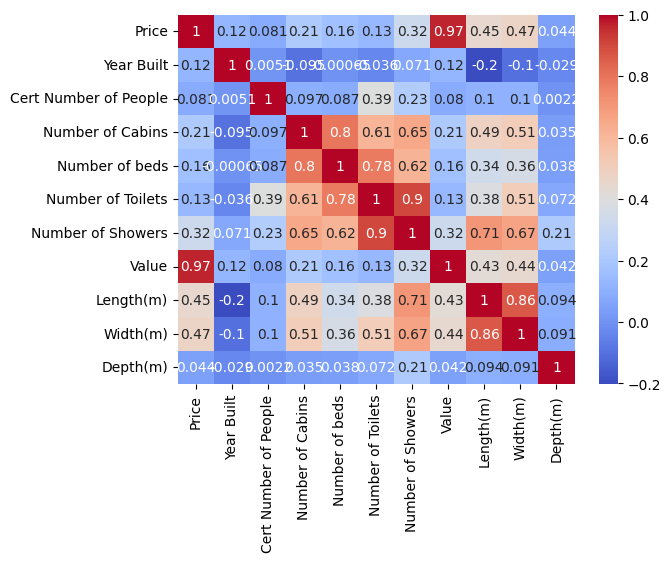

In [428]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

interval columns not set, guessing: ['Price', 'Year Built', 'Cert Number of People', 'Number of Cabins', 'Number of beds', 'Number of Toilets', 'Number of Showers', 'Value', 'Length(m)', 'Width(m)', 'Depth(m)']


/Users/josezambrano/Documents/GitHub/dsft_ene23/venv/lib/python3.8/site-packages/phik/data_quality.py:59: UserWarning: The number of unique values of variable Comments is large: 5994. Are you sure this is not an interval variable? Analysis for pairs of variables including Comments can be slow.
  warnings.warn(
/Users/josezambrano/Documents/GitHub/dsft_ene23/venv/lib/python3.8/site-packages/phik/data_quality.py:59: UserWarning: The number of unique values of variable Displacement is large: 1289. Are you sure this is not an interval variable? Analysis for pairs of variables including Displacement can be slow.
  warnings.warn(
/Users/josezambrano/Documents/GitHub/dsft_ene23/venv/lib/python3.8/site-packages/phik/data_quality.py:59: UserWarning: The number of unique values of variable Engine is large: 4401. Are you sure this is not an interval variable? Analysis for pairs of variables including Engine can be slow.
  warnings.warn(
/Users/josezambrano/Documents/GitHub/dsft_ene23/venv/lib/pyt

<Axes: >

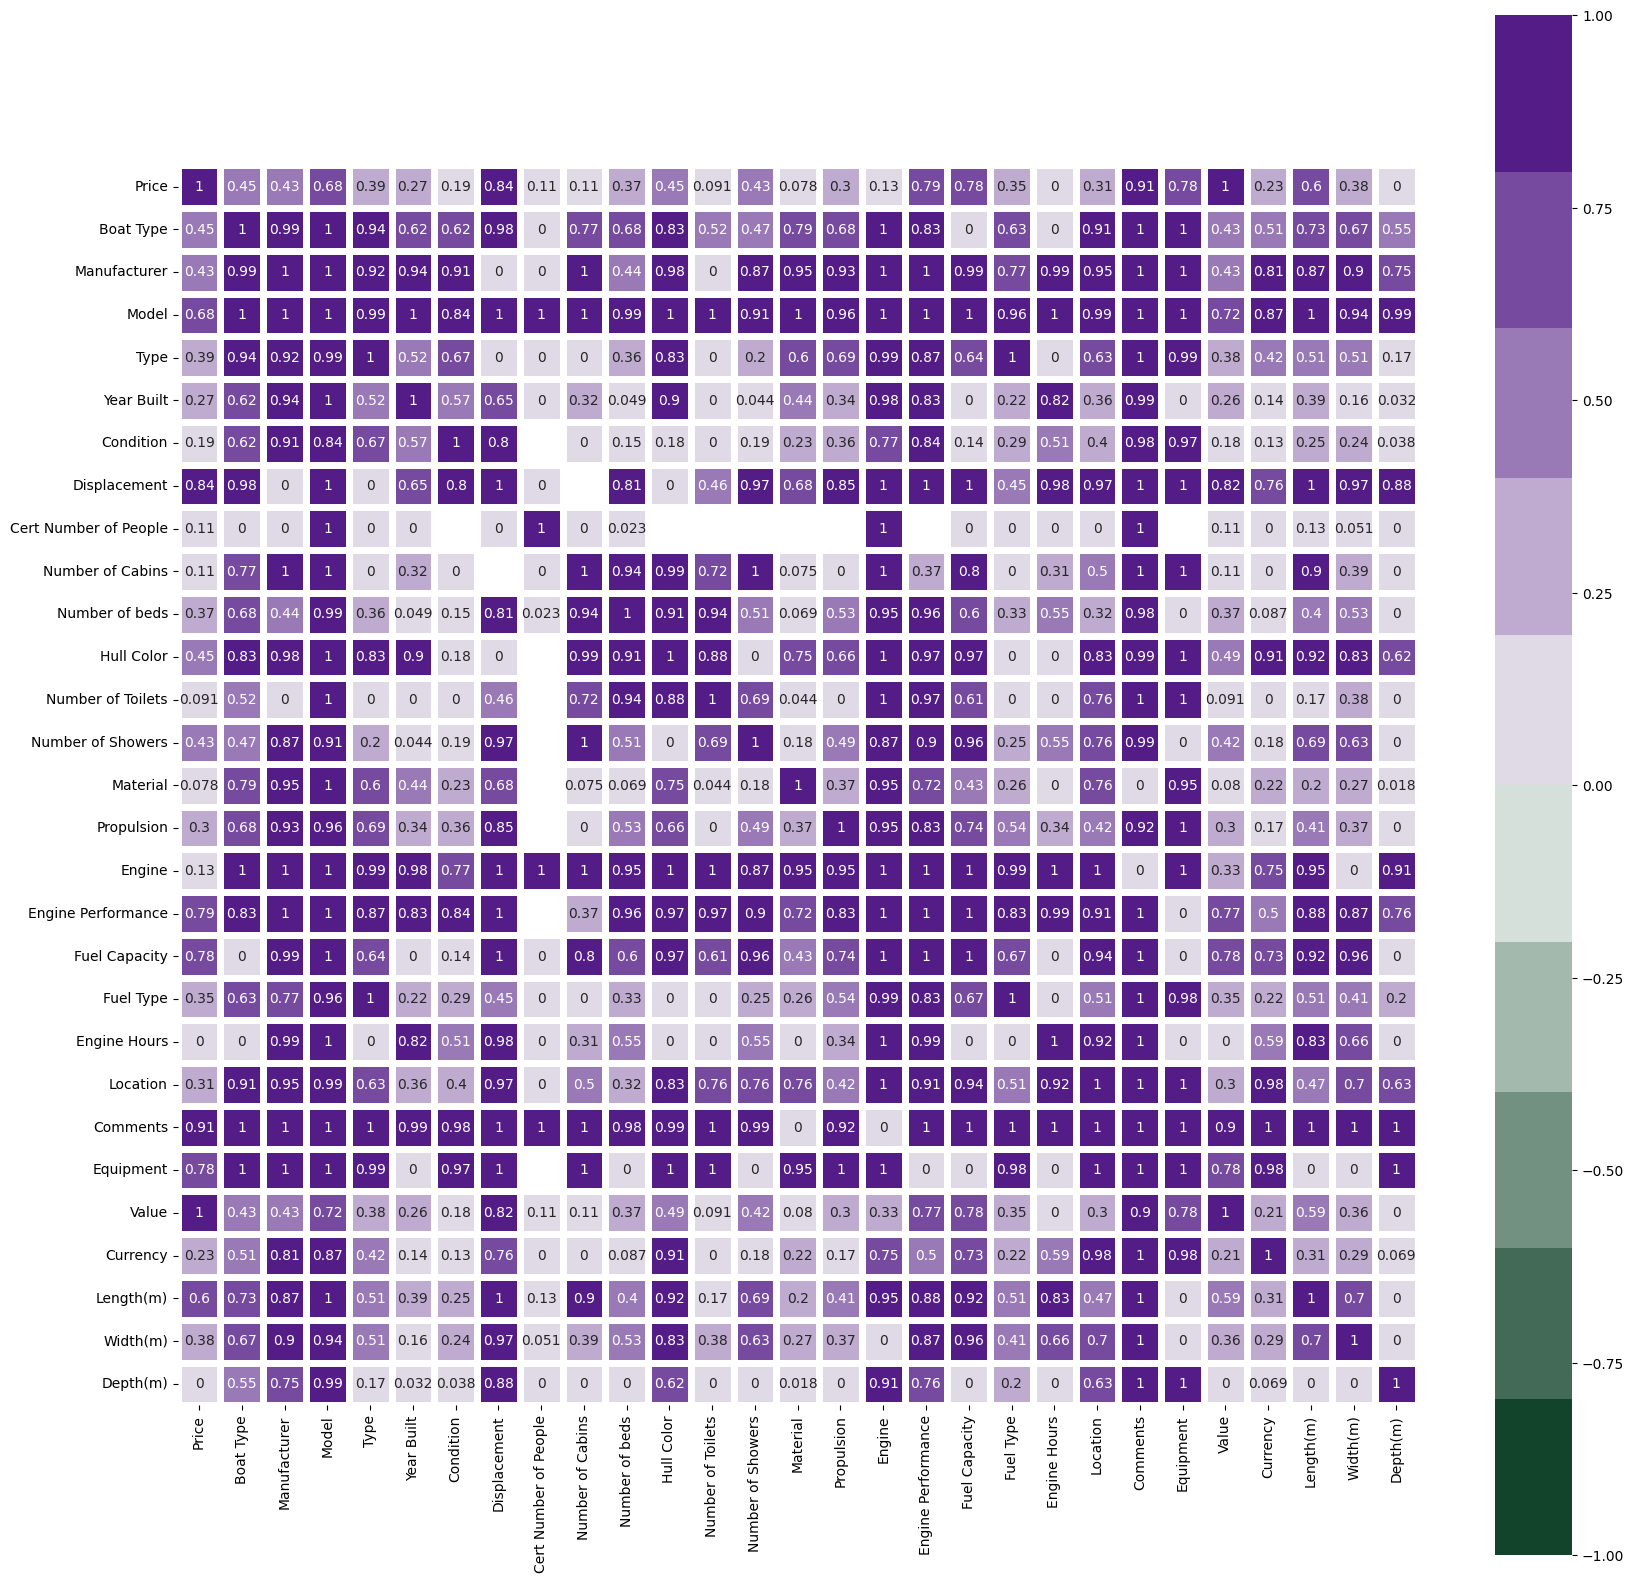

In [294]:
#No ejecutar por que tarda 13 horas aprox

#phik_matrix=data.phik_matrix()
#plt.figure(figsize=(20, 20))
#sns.heatmap(phik_matrix, vmin=-1, vmax=1, center=0,
            #cmap=sns.diverging_palette(145, 280, s=85, l=25, n=10), 
            #square=True, annot=True, 
            #linewidths=5)


Podemos notar que la variable que tienen mayor relacion con el precio es  "Displacement"



In [935]:
data=pd.read_csv('Boat1.csv')
data.head()

,Price,Boat Type,Manufacturer,Model,Type,Year Built,Condition,Displacement,Cert Number of People,Number of Cabins,Number of beds,Hull Color,Number of Toilets,Number of Bathrooms,Number of Showers,Material,Holding Tank,Propulsion,Engine,Engine Performance,Fuel Capacity,Fuel Type,Engine Hours,Max Speed,Cruising Speed,Location,Comments,Equipment,Value,Currency,Length(m),Width(m),Depth(m)
0,3395.746413,Motor Yacht,Rigiflex power boats,CAP 400,new boat from stock,2017.0,as new,NaN,7.0,NaN,NaN,white,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Switzerland,NaN,NaN,3337.0,CHF,4.00,1.90,NaN
1,3490.000000,Center console boat,Terhi power boats,400 C,new boat from stock,2020.0,new,150 kg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Thermoplastic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Germany,"In den Farben weiÃ oder grÃ¼n lieferbar.,,2 a...",NaN,3490.0,EUR,4.00,1.50,NaN
2,3836.369187,Sport Boat,Marine power boats,370 S - Aluboot,new boat from stock,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,Aluminium,NaN,NaN,(Permission for Lake of Constance),NaN,NaN,NaN,NaN,NaN,NaN,Switzerland,NaN,NaN,3770.0,CHF,3.69,1.42,0.25
3,3476.043484,Sport Boat,Pioner power boats,10 Classic Special Edition,new boat from stock,2020.0,NaN,110 kg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Denmark,"MORSOM OG LETKÃRT KVALITETSBÃ D!,Nye Pioner 1...",NaN,25900.0,DKK,3.00,1.00,NaN
4,3084.923538,Classic,NaN,Gullholmensnipa 21,Used boat,1974.0,good,2'000 kg,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,Inboard with Shaft,VolvoPenta MD 2002,1 x 18 HP / 13 kW,50 l,NaN,500 h,NaN,NaN,Nordsee,NaN,"Anchor,Battery,Bilge Pump,Bilge pump,Cockpit C...",35000.0,SEK,6.30,2.50,0.75


In [240]:
#elimino Value 
#elimino la unidad y grafico 
#knn imputer para rellenar valores 

In [936]:
columns_to_drop = ["Value","Currency"]
data = data.drop(columns_to_drop, axis=1)

In [937]:
data['Displacement'] = data['Displacement'].str.extract('(\d+\.\d+|\d+)').astype(float)
data['Fuel Capacity'] = data['Fuel Capacity'].str.extract('(\d+\.\d+|\d+)').astype(str).astype(float)
data['Fuel Type'] = data['Fuel Type'].str.extract('(\d+\.\d+|\d+)').astype(str).astype(float)
data['Engine Hours'] = data['Engine Hours'].str.extract('(\d+\.\d+|\d+)').astype(str).astype(float)


In [ ]:
# quito los outliers de la columna precio para afinar mi predictor 

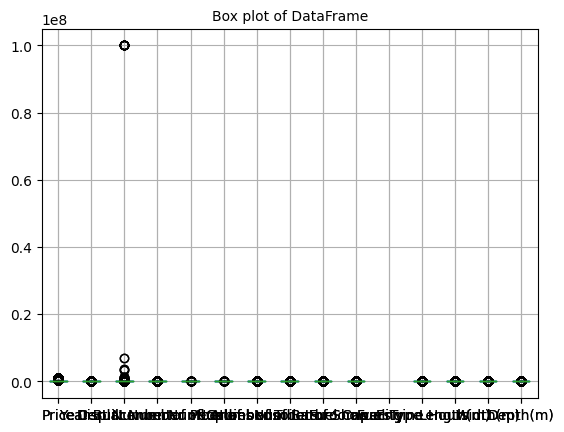

In [938]:
boxplot = data.boxplot()
boxplot = data.boxplot()
plt.title('Box plot of DataFrame', fontsize=10)
plt.show()

In [ ]:
#Guardo el dataframe en un nuevo CSV

In [3]:
data.to_csv('Boat2.csv', index=False)

NameError: name 'data' is not defined

## REINICIA ##

In [105]:
data=pd.read_csv('Boat2.csv')

In [106]:
data.dropna(subset='Displacement', inplace=True)


In [107]:
data.dropna(subset='Number of Cabins', inplace=True)

In [108]:
from sklearn.impute import KNNImputer
import pandas as pd

imputer = KNNImputer(n_neighbors=2)


cols_to_impute = ['Cert Number of People']
df_cols_imputed = imputer.fit_transform(data[cols_to_impute])

In [109]:
pd.set_option('display.max_columns', None)
data.head()

,Price,Boat Type,Manufacturer,Model,Type,Year Built,Condition,Displacement,Cert Number of People,Number of Cabins,Number of beds,Hull Color,Number of Toilets,Number of Bathrooms,Number of Showers,Material,Holding Tank,Propulsion,Engine,Engine Performance,Fuel Capacity,Fuel Type,Engine Hours,Max Speed,Cruising Speed,Location,Comments,Equipment,Length(m),Width(m),Depth(m)
22,4000.000000,Cabin Boat,NaN,Backdecker,"Used boat,Unleaded",2011.0,good,800.0,3.0,2.0,3.0,NaN,NaN,1.0,NaN,GRP,NaN,"Outboard, four-stroke",Mercury,1 x 5 HP / 3.7 kW,54.0,NaN,9.0,NaN,NaN,Germany,NaN,Swim Ladder,6.37,2.31,0.45
40,3866.897324,Cabin Boat,Draco power boats,2100,"Used boat,Unleaded",1980.0,well-groomed,1.0,7.0,1.0,1.0,NaN,NaN,NaN,NaN,GRP,NaN,Sterndrive,Mercruiser/MCM 470,1 x 170 HP / 125 kW,NaN,NaN,1130.0,NaN,NaN,Switzerland,NaN,"Anchor,Battery,Bilge Pump,Bilge pump,Bimini To...",6.20,2.45,0.60
75,7123.231912,Cabin Boat,Fjord power boats,Weekender 24,"Used boat,Unleaded",1980.0,to be done up,2.0,8.0,1.0,2.0,NaN,NaN,1.0,NaN,GRP,NaN,Sterndrive,Volvo Penta 260A,1 x 260 HP / 191 kW,250.0,NaN,1593.0,NaN,NaN,Switzerland,NaN,"Anchor,Battery,Battery Charger,Bilge Pump,Cock...",7.26,2.90,1.00
107,8500.000000,"Deck Boat,Pilothouse,Sport Boat",NaN,Aluminium KajÃ¼tboot,", ,, ,Used boat,Unleaded",1998.0,to be done up,2.0,4.0,1.0,3.0,NaN,NaN,NaN,NaN,Aluminium,150 l,Sterndrive,Volvo Penta,1 x 250 HP / 184 kW,230.0,NaN,385.0,NaN,NaN,Germany,NaN,"Anchor,Battery,Bilge Pump,Bilge pump,Bimini To...",7.90,2.50,1.00
131,10000.000000,Sport Boat,Bayliner power boats,CIERA 2655 SUNBRIDGE,"Used boat,Unleaded",1993.0,NaN,6000.0,NaN,1.0,2.0,NaN,NaN,NaN,NaN,GRP,NaN,NaN,MERCRUISER Mercruiser,1 x 260 HP / 191 kW,265.0,NaN,200.0,NaN,NaN,Italy,ADDITIONAL PETROL TANK: ONE FROM 265 AND ONE F...,"Battery,Depth Instrument,FM Radio,GPS",8.50,2.60,0.60


In [706]:
#Hago catboost 

In [110]:
import category_encoders as ce
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split

In [111]:
data.fillna(0, inplace=True)

In [112]:
#Hago esto para quietar outliers 

mask = (data['Price'] >= 0) & (data['Price'] <= 1000000)


df_filtrado= data[mask]


df_filtrado

,Price,Boat Type,Manufacturer,Model,Type,Year Built,Condition,Displacement,Cert Number of People,Number of Cabins,Number of beds,Hull Color,Number of Toilets,Number of Bathrooms,Number of Showers,Material,Holding Tank,Propulsion,Engine,Engine Performance,Fuel Capacity,Fuel Type,Engine Hours,Max Speed,Cruising Speed,Location,Comments,Equipment,Length(m),Width(m),Depth(m)
22,4000.000000,Cabin Boat,0,Backdecker,"Used boat,Unleaded",2011.0,good,800.0,3.0,2.0,3.0,0,0.0,1.0,0.0,GRP,0,"Outboard, four-stroke",Mercury,1 x 5 HP / 3.7 kW,54.0,0.0,9.0,0,0,Germany,0,Swim Ladder,6.37,2.31,0.45
40,3866.897324,Cabin Boat,Draco power boats,2100,"Used boat,Unleaded",1980.0,well-groomed,1.0,7.0,1.0,1.0,0,0.0,0.0,0.0,GRP,0,Sterndrive,Mercruiser/MCM 470,1 x 170 HP / 125 kW,0.0,0.0,1130.0,0,0,Switzerland,0,"Anchor,Battery,Bilge Pump,Bilge pump,Bimini To...",6.20,2.45,0.60
75,7123.231912,Cabin Boat,Fjord power boats,Weekender 24,"Used boat,Unleaded",1980.0,to be done up,2.0,8.0,1.0,2.0,0,0.0,1.0,0.0,GRP,0,Sterndrive,Volvo Penta 260A,1 x 260 HP / 191 kW,250.0,0.0,1593.0,0,0,Switzerland,0,"Anchor,Battery,Battery Charger,Bilge Pump,Cock...",7.26,2.90,1.00
107,8500.000000,"Deck Boat,Pilothouse,Sport Boat",0,Aluminium KajÃ¼tboot,", ,, ,Used boat,Unleaded",1998.0,to be done up,2.0,4.0,1.0,3.0,0,0.0,0.0,0.0,Aluminium,150 l,Sterndrive,Volvo Penta,1 x 250 HP / 184 kW,230.0,0.0,385.0,0,0,Germany,0,"Anchor,Battery,Bilge Pump,Bilge pump,Bimini To...",7.90,2.50,1.00
131,10000.000000,Sport Boat,Bayliner power boats,CIERA 2655 SUNBRIDGE,"Used boat,Unleaded",1993.0,0,6000.0,0.0,1.0,2.0,0,0.0,0.0,0.0,GRP,0,0,MERCRUISER Mercruiser,1 x 260 HP / 191 kW,265.0,0.0,200.0,0,0,Italy,ADDITIONAL PETROL TANK: ONE FROM 265 AND ONE F...,"Battery,Depth Instrument,FM Radio,GPS",8.50,2.60,0.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9958,5900.000000,Cabin Boat,0,Familienboot,"Used boat,Unleaded",1965.0,good,2.0,0.0,1.0,1.0,0,0.0,1.0,0.0,Wood,0,Sterndrive,Volvo AQ Benziner,1 x 110 HP / 81 kW,400.0,0.0,70.0,0,0,Germany,0,"Anchor,Battery,Fire Extinguisher,Navigation li...",8.30,2.50,0.60
9964,4999.000000,Pilothouse,0,3x9m Boot,"Used boat,Diesel",1955.0,for tinkers,45.0,0.0,2.0,0.0,0,0.0,0.0,0.0,GRP,0,Inboard with Shaft,2 x OM 636 43 PS,2 x 43 HP / 32 kW,800.0,0.0,0.0,0,0,Germany,0,"Anchor,Battery,Bilge Pump,Bilge pump,Bow Ancho...",9.00,3.00,0.70
9965,4990.000000,Cabin Boat,0,KajÃ¼tboot mit 40 PS Suzuki - Selbstmisch,Unleaded,1987.0,0,1.0,0.0,1.0,2.0,weiss,0.0,0.0,0.0,GRP,0,0,Suzuki,1 x 40 HP / 29 kW,0.0,0.0,0.0,0,0,Germany,0,0,6.50,2.50,0.60
9966,4990.000000,Sport Boat,0,SPORTBOOT CAMO PLAST,"Used boat,Unleaded",0.0,0,300.0,0.0,1.0,2.0,0,0.0,0.0,0.0,GRP,0,0,HONDA,1 x 50 HP / 37 kW,25.0,0.0,0.0,0,0,Germany,"Sport und Angelboot Camo Plast.,Ideales Einste...",0,4.60,1.80,0.40


In [113]:
X = df_filtrado.drop("Price", axis=1)
Y = df_filtrado["Price"]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
cat_cols = [col for col in X_train.columns if X_train[col].dtype == 'object']

ce_encoder = ce.CatBoostEncoder(cols=cat_cols)
ce_encoder.fit(X_train[cat_cols], y_train)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

X_train[cat_cols] = ce_encoder.transform(X_train[cat_cols])
X_test[cat_cols] = ce_encoder.transform(X_test[cat_cols])

In [114]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_X_train = scaler.fit_transform(X_test)



In [115]:

y_test_array = np.array(y_test)
scaler = StandardScaler()
df_y_train = scaler.fit_transform(y_test_array.reshape(-1, 1)).flatten()


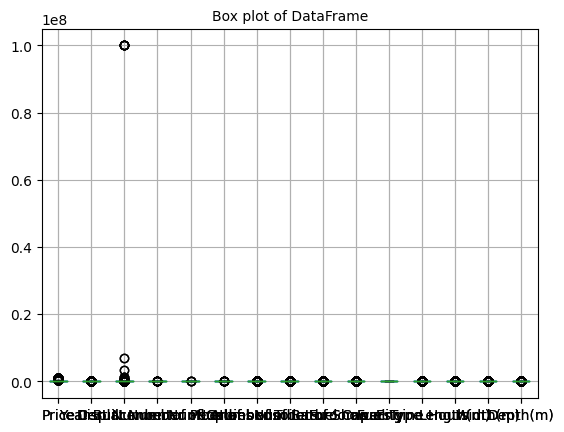

In [116]:
boxplot = df_filtrado.boxplot()
boxplot = df_filtrado.boxplot()
plt.title('Box plot of DataFrame', fontsize=10)
plt.show()

In [117]:
import seaborn as sns
sns.pairplot(df_filtrado)

In [118]:
df_filtrado.dtypes

Price                    float64
Boat Type                 object
Manufacturer              object
Model                     object
Type                      object
Year Built               float64
Condition                 object
Displacement             float64
Cert Number of People    float64
Number of Cabins         float64
Number of beds           float64
Hull Color                object
Number of Toilets        float64
Number of Bathrooms      float64
Number of Showers        float64
Material                  object
Holding Tank              object
Propulsion                object
Engine                    object
Engine Performance        object
Fuel Capacity            float64
Fuel Type                float64
Engine Hours             float64
Max Speed                 object
Cruising Speed            object
Location                  object
Comments                  object
Equipment                 object
Length(m)                float64
Width(m)                 float64
Depth(m)  

In [119]:

from sklearn.ensemble import RandomForestRegressor
import pandas as pd

X = X_train
Y = y_train


names = X.columns

rf = RandomForestRegressor(n_estimators = 100)
rf.fit(X, Y)

scores = sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), names), reverse=True)
df_rf = pd.DataFrame(scores, columns=['Score RF', 'Feature'])

df_rf 


,Score RF,Feature
0,0.3488,Length(m)
1,0.1410,Year Built
2,0.0907,Model
3,0.0897,Engine Performance
4,0.0518,Width(m)
5,0.0410,Manufacturer
6,0.0373,Displacement
7,0.0369,Fuel Capacity
8,0.0218,Depth(m)
9,0.0168,Location


## Selectkbest ##

In [120]:
from sklearn.feature_selection import SelectKBest

print(X.shape)
sel = SelectKBest(k=10)
X_new = sel.fit_transform(X, Y)
print(X_new.shape)
print(sel.scores_)

df_slc_=pd.DataFrame({'Feature': names, 'score KB': sel.scores_}).sort_values('score KB', ascending=False)
df_slc_

(2467, 30)
(2467, 10)
[2.53470379 2.55481037 2.23718055 2.37513469 5.39744768 1.5031337
 0.40648957 0.28050082 3.669386   2.1199996  1.34270982 1.77653985
 1.16201572 1.36633881 1.06233729 1.78921693 1.96021625 1.95748135
 2.82936965 6.55632291        nan 1.19271884 0.93511495 0.87488615
 2.04929465 1.44692254 1.90986895 6.99729537 6.59610082 1.05190783]


/Users/josezambrano/Documents/GitHub/dsft_ene23/venv/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/josezambrano/Documents/GitHub/dsft_ene23/venv/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


,Feature,score KB
27,Length(m),6.997295
28,Width(m),6.596101
19,Fuel Capacity,6.556323
4,Year Built,5.397448
8,Number of Cabins,3.669386
18,Engine Performance,2.829370
1,Manufacturer,2.554810
0,Boat Type,2.534704
3,Type,2.375135
2,Model,2.237181


In [121]:
merged_df = pd.merge(df_slc_, df_rf, how='outer', indicator=True)


merged_df.drop('_merge', axis=1, inplace=True)
merged_df

,Feature,score KB,Score RF
0,Length(m),6.997295,0.3488
1,Width(m),6.596101,0.0518
2,Fuel Capacity,6.556323,0.0369
3,Year Built,5.397448,0.1410
4,Number of Cabins,3.669386,0.0045
5,Engine Performance,2.829370,0.0897
6,Manufacturer,2.554810,0.0410
7,Boat Type,2.534704,0.0082
8,Type,2.375135,0.0130
9,Model,2.237181,0.0907


In [122]:
merged_df["Feature"].tolist()

['Length(m)',
 'Width(m)',
 'Fuel Capacity',
 'Year Built',
 'Number of Cabins',
 'Engine Performance',
 'Manufacturer',
 'Boat Type',
 'Type',
 'Model',
 'Number of beds',
 'Location',
 'Propulsion',
 'Engine',
 'Equipment',
 'Holding Tank',
 'Number of Toilets',
 'Condition',
 'Comments',
 'Number of Showers',
 'Hull Color',
 'Engine Hours',
 'Number of Bathrooms',
 'Material',
 'Depth(m)',
 'Max Speed',
 'Cruising Speed',
 'Displacement',
 'Cert Number of People',
 'Fuel Type']

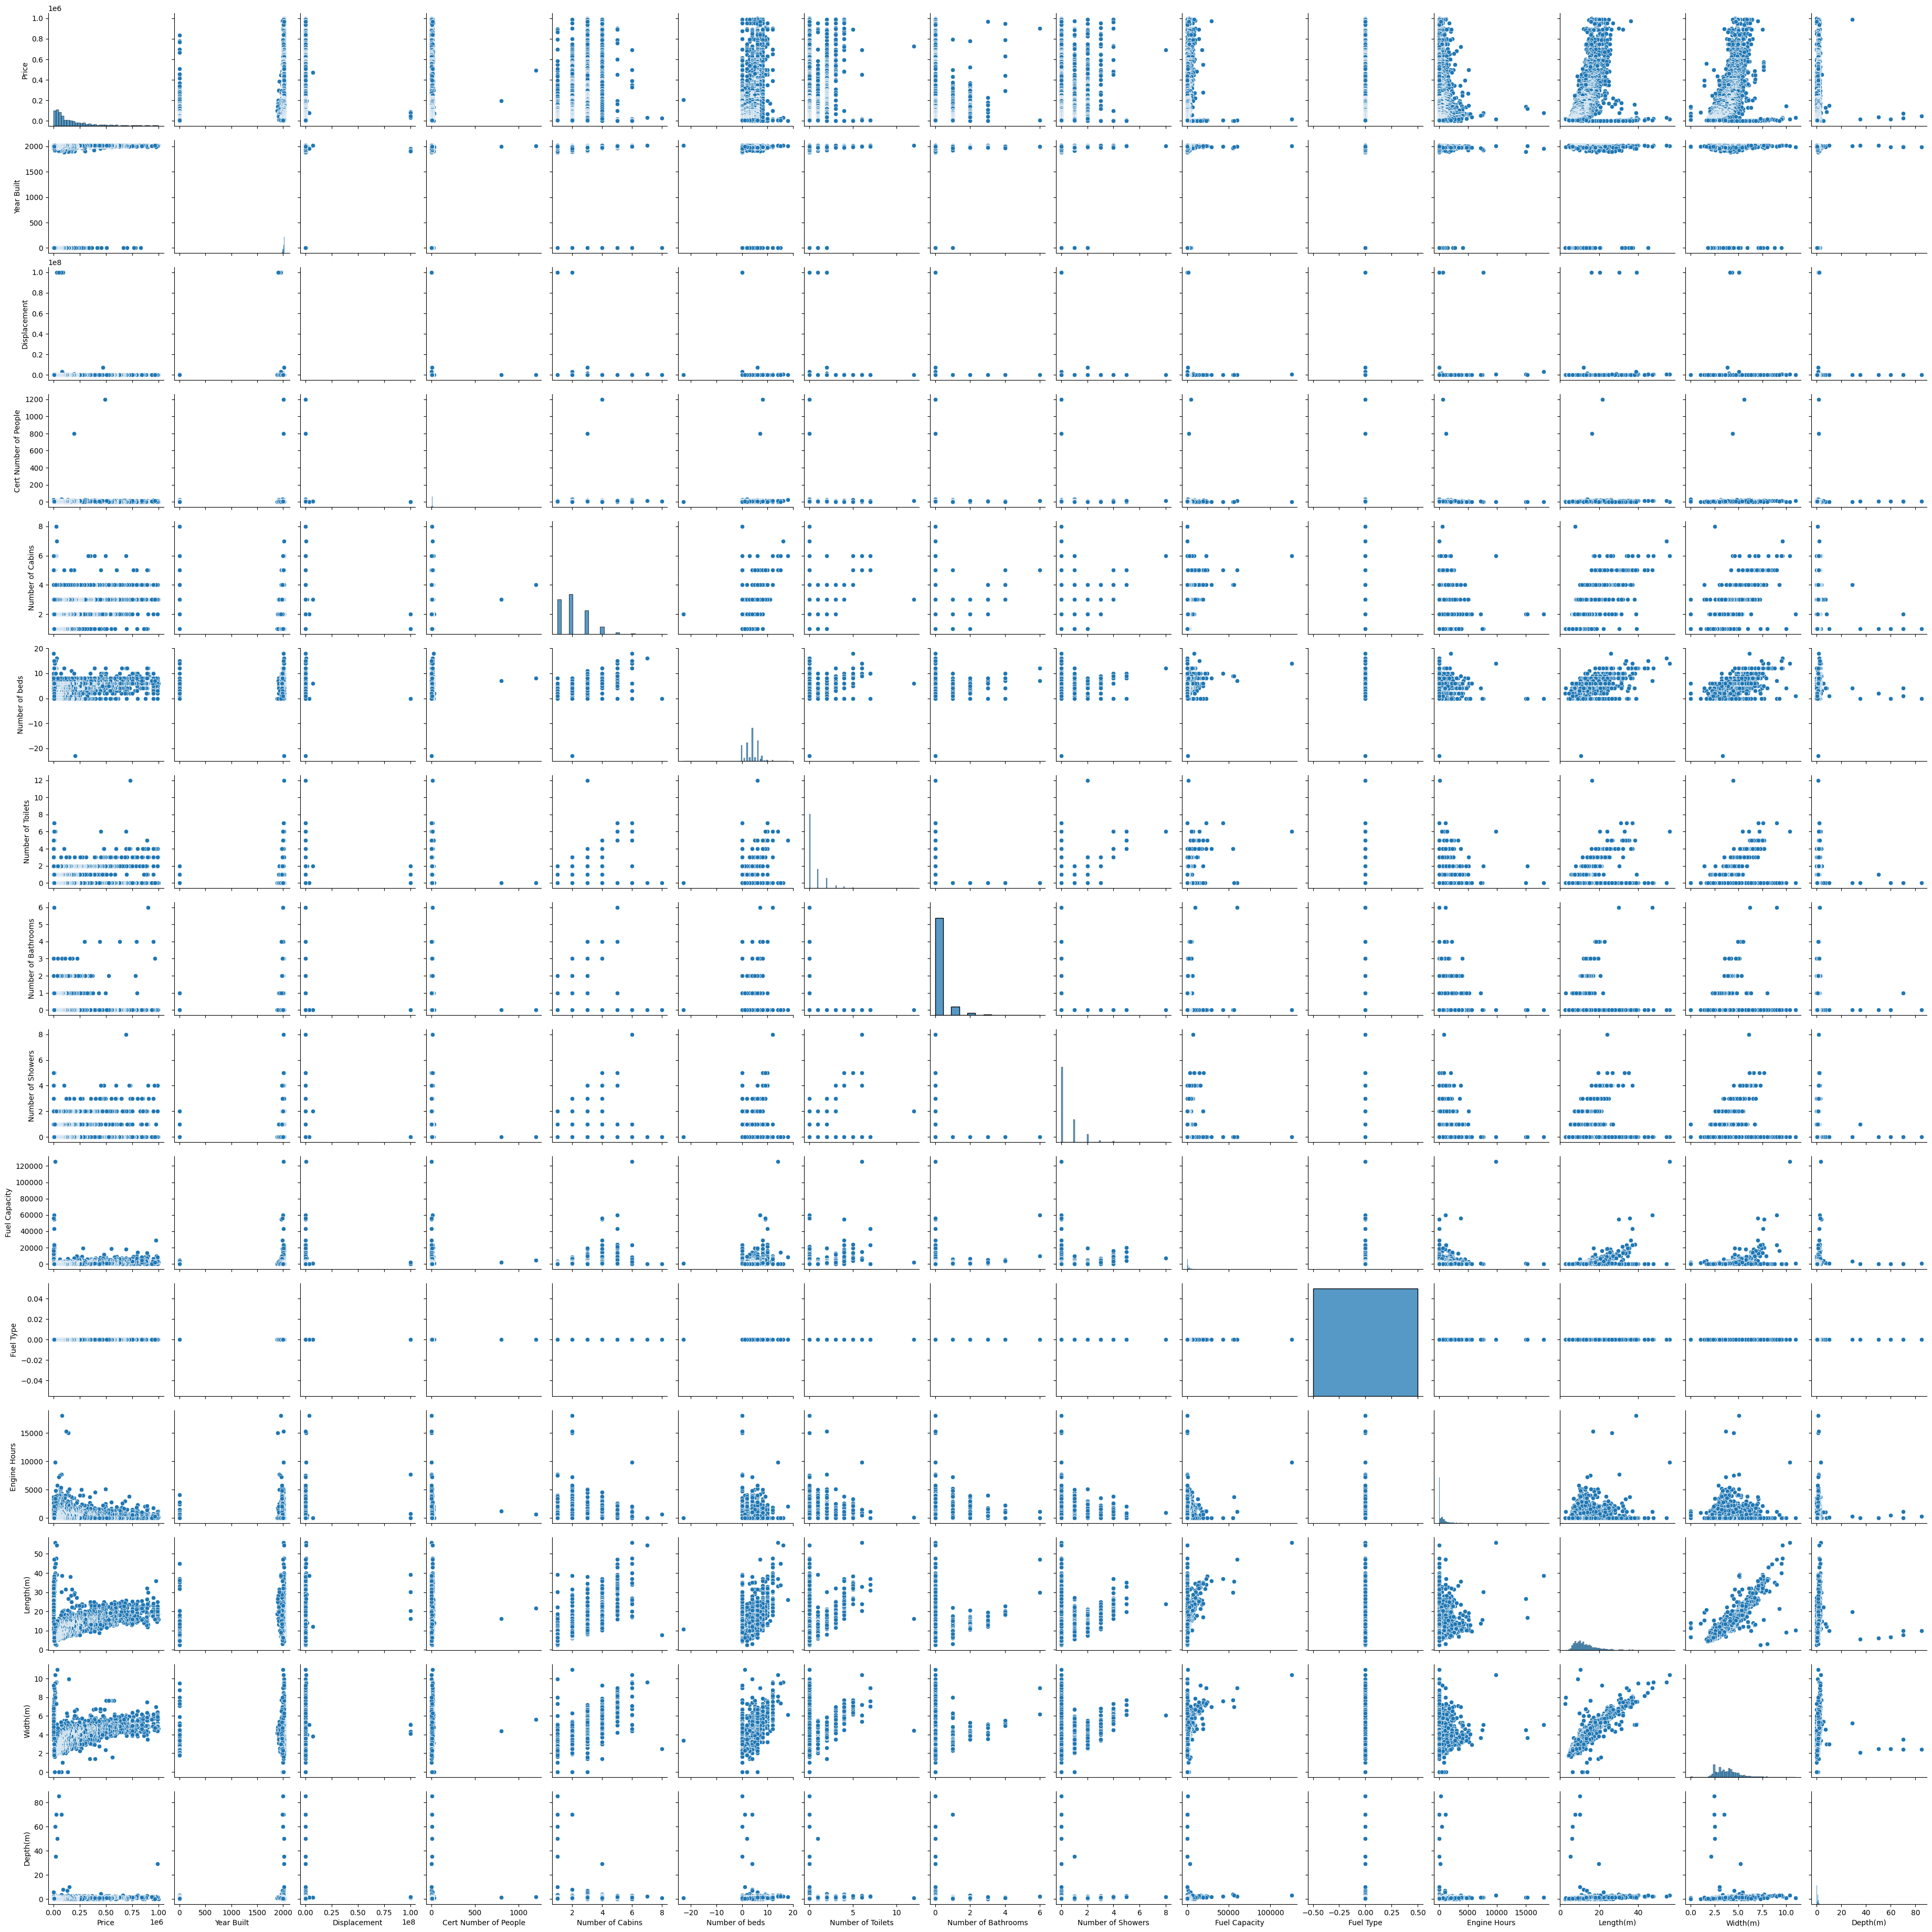

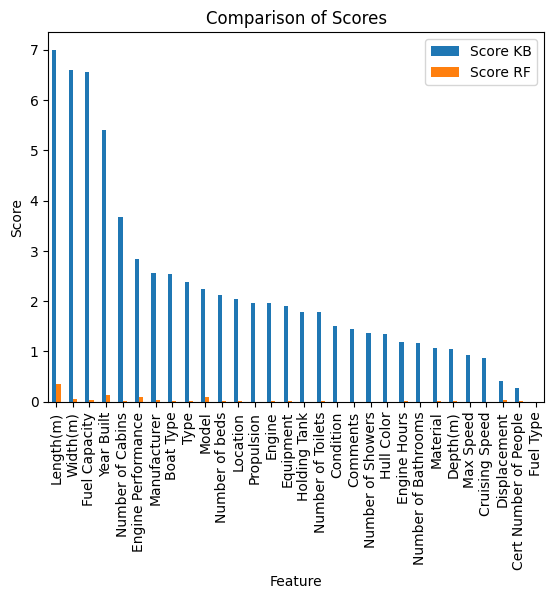

In [123]:
merged_df.set_index('Feature', inplace=True)



ax = merged_df.plot(kind='bar')
ax.set_ylabel('Score')

plt.legend(labels=['Score KB', 'Score RF'])
plt.title('Comparison of Scores')
plt.show()

In [124]:

X_train = X_train.drop(['Engine', 'Location', 'Number of Toilets', 'Holding Tank', 'Condition', 'Equipment','Hull Color', 'Comments', 'Number of Showers', 'Number of Bathrooms', 'Engine Hours','Material', 'Cruising Speed', 'Max Speed', 'Depth(m)', 'Displacement','Cert Number of People', 'Fuel Type'], axis=1)
X_test = X_test.drop(['Engine', 'Location', 'Number of Toilets', 'Holding Tank', 'Condition', 'Equipment','Hull Color', 'Comments', 'Number of Showers', 'Number of Bathrooms', 'Engine Hours','Material', 'Cruising Speed', 'Max Speed', 'Depth(m)', 'Displacement','Cert Number of People', 'Fuel Type'], axis=1)

## Modelos ##

## LinearRegression ##

In [125]:
data_LR=pd.concat([X_train,y_train],axis=1)
data_LR

,Boat Type,Manufacturer,Model,Type,Year Built,Number of Cabins,Number of beds,Propulsion,Engine Performance,Fuel Capacity,Length(m),Width(m),Price
2838,222039.806738,343070.478072,179211.434217,230547.198633,2008.0,2.0,5.0,195523.347111,168876.050092,1136.0,12.49,4.20,360000.000000
831,82108.213854,72196.601426,179211.434217,92507.968322,0.0,1.0,2.0,195523.347111,168876.050092,230.0,6.50,2.55,39600.000000
8966,65517.496320,222513.345127,179211.434217,230547.198633,1990.0,2.0,4.0,195523.347111,77201.905703,300.0,9.10,2.99,28000.000000
3497,115197.577862,33486.633460,179211.434217,283928.758009,2012.0,4.0,8.0,195523.347111,118274.108554,0.0,23.67,6.60,1895.000000
2484,294669.206243,163945.354482,206403.811406,183657.079210,2011.0,2.0,4.0,195523.347111,220715.933829,800.0,12.90,3.99,220000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3235,275550.659543,160363.379410,179211.434217,230547.198633,2008.0,4.0,8.0,195523.347111,388827.858554,7000.0,21.38,5.60,1100.000000
3544,222039.806738,179211.434217,179211.434217,230547.198633,2008.0,3.0,6.0,195523.347111,168876.050092,6600.0,23.85,5.32,1500.000000
2635,147142.445439,160363.379410,179211.434217,230547.198633,2011.0,2.0,0.0,195523.347111,66997.680084,1300.0,18.30,3.94,264500.000000
9844,79478.705549,179211.434217,179211.434217,61913.670834,1990.0,1.0,0.0,84396.284839,107012.497115,40.0,6.00,1.80,10176.045589


In [126]:
#NO OLVIDAR ESTANDARIZAR 

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression

df2 = data_LR
scaler = StandardScaler()
scaler.fit(df2)

lr = LinearRegression()
X_train = df2.drop(columns = ['Price'])
Y_train = df2['Price']

lr.fit(X_train, Y_train)
preds = lr.predict(X_train)

print("Score del modelo (R^2):", round(lr.score(X_train, Y_train), 4))
print("MAE score:", round(mean_absolute_error(preds, Y_train), 4))
print("MSE score:", round(mean_squared_error(preds, Y_train), 4))
print("RMSE score:", round(np.sqrt(mean_squared_error(preds, Y_train)), 4))

def mean_absolute_percentage_error(y_pred, y_true): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


print("MAPE score:", round(mean_absolute_percentage_error(preds, Y_train), 4))


Score del modelo (R^2): 0.4734
MAE score: 93090.0504
MSE score: 21172261895.0207
RMSE score: 145506.9136
MAPE score: 1245.6349


In [127]:
import pickle

filename = 'linear_regression_model.pkl'

with open(filename, 'wb') as file:
    pickle.dump(lr, file)

print("Guardado como", filename)

Guardado como linear_regression_model.pkl


## DecisionTree ##

In [ ]:
# no standarizo 

In [128]:
from sklearn.tree import DecisionTreeRegressor


dt = DecisionTreeRegressor()


dt.fit(X_train, y_train)


y_pred = dt.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean squared error:', mse)
print('R-squared:', r2)
print('Score:', dt.score(X_test, y_test))

Mean squared error: 25501551524.65163
R-squared: 0.4148386187826669
Score: 0.4148386187826669


In [129]:
import pickle

filename = 'decision_tree_model.pkl'

with open(filename, 'wb') as file:
    pickle.dump(dt, file)

print("Model saved successfully to", filename)


Model saved successfully to decision_tree_model.pkl


## RandomForest ##

In [ ]:
# no standarizo 

In [130]:

from sklearn.metrics import mean_squared_error
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score

y_train = pd.cut(y_train, bins=3, labels=False)

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_test = pd.cut(y_test, bins=3, labels=False)

y_pred = rf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print('Mean squared error:', mse)
print('R-squared:', r2)
print('Score:', rf.score(X_test, y_test))


Mean squared error: 0.12348015122873346
R-squared: 0.4148386187826669
Score: 0.5635917024501137


In [131]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, make_scorer

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [15, 16, 17],
    'min_samples_split': [2, 4, 6]
}

grid_search = GridSearchCV(rf, param_grid=param_grid, cv=5, scoring=make_scorer(mean_squared_error))
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)

y_test = pd.cut(y_test, bins=3, labels=False)

y_pred = grid_search.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print('Mean squared error:', mse)
print('R-squared:', r2_score(y_test, y_pred))
print('Score:', grid_search.score(X_test, y_test))

Best parameters: {'max_depth': 15, 'min_samples_split': 2, 'n_estimators': 100}
Mean squared error: 0.12406016501052172
R-squared: 0.5615417954444379
Score: 0.12406016501052172


## XGBoost ##

In [71]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split


In [132]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=6, learning_rate=0.1)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print('R-squared:', r2)
print('Score:', model.score(X_test, y_test))

Mean Squared Error: 0.12324727579449357
R-squared: 0.5644147397624795
Score: 0.5644147397624795


In [97]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV


model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=6, learning_rate=0.1)


param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [6, 8, 10],
    'learning_rate': [0.1, 0.01, 0.001]
}


grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)


print('Best parameters:', grid_search.best_params_)
print('Best score:', -grid_search.best_score_)


best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print('R-squared:', r2)
print('Score:', best_model.score(X_test, y_test))


Best parameters: {'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 300}
Best score: 0.1016353412850958
Mean Squared Error: 0.1253549792471812
R-squared: 0.5569656131913308
Score: 0.5569656131913308


# En los siguientes modelos en necesario estandarizar #

## KNN Regressor ##

In [ ]:
# KNN
grid_neighbors = {"n_neighbors": [3,5,7,9,11],       # Pares acepta sklearn, pero se suele poner impares, por los empates
                  "weights": ["uniform","distance"]  # Ponderar o no las clasificaciones en 
                                                     # función de la inversa de la distancia a cada vecino

In [ ]:
#hago el fit y transfom en xtrain
#y en el x test solo hago transform 
# estandarizo por que mide distancias

In [74]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

In [90]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


k = 3 
knn = KNeighborsRegressor(n_neighbors=k)


knn.fit(X_train_scaled, y_train)


y_pred = knn.predict(X_test_scaled)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


cv_scores = cross_val_score(knn, X_train_scaled, y_train, cv=5)
print('Cross-validation scores:', cv_scores)
print('Mean cross-validation score:', cv_scores.mean())

print('Mean Squared Error:', mse)
print('R-squared:', r2)


Cross-validation scores: [0.40534287 0.24854205 0.34813841 0.34611499 0.26877772]
Mean cross-validation score: 0.32338320915291674
Mean Squared Error: 0.21949170342365049
R-squared: 0.22426398360977806


## SVM ##

In [ ]:
grid_svm = {"C": [0.01, 0.1, 0.3, 0.5, 1.0, 3, 5.0, 15, 30], # Parametro de regularizacion
            "kernel": ["linear","poly","rbf"], # Tipo de kernel, probar varios
            "degree": [2,3,4,5], # Cuantos grados queremos para el kernel polinomico
            "gamma": [0.001, 0.1, "auto", 1.0, 10.0, 30.0] # Coeficiente de regulaizacion para los kernels rbf, poly y sigmoid
           }

In [ ]:
#hago el fit y transfom en xtrain
#y en el x test solo hago transform 
# estandarizo por que mide distancias

In [133]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

C = 1.0 
epsilon = 0.1 
svr = SVR(kernel='rbf', C=C, epsilon=epsilon)

svr.fit(X_train_scaled, y_train)


y_pred = svr.predict(X_test_scaled)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


cv_scores = cross_val_score(svr, X_train_scaled, y_train, cv=5)
print('Cross-validation scores:', cv_scores)
print('Mean cross-validation score:', cv_scores.mean())

print('Mean Squared Error:', mse)
print('R-squared:', r2)



Cross-validation scores: [0.33799246 0.38773791 0.38615323 0.46243134 0.30458223]
Mean cross-validation score: 0.3757794353963875
Mean Squared Error: 0.21569296420414885
R-squared: 0.23768963379826713


## Modelo Escogido ##

Precisión en la predicción: El modelo Random Forest es conocido por su alta precisión en la predicción de valores, lo que puede ser evidente en la métrica "Score" que mencionaste. Un alto puntaje indica que el modelo tiene una buena precisión en la predicción de los valores de prueba.

Robustez ante datos ruidosos: El modelo Random Forest es un modelo muy robusto que puede manejar datos con alta dimensionalidad, multicolinealidad, valores atípicos y datos ruidosos. Esto se debe a que utiliza múltiples árboles de decisión y promedia las predicciones, lo que reduce el riesgo de sobreajuste en los datos.

Interpretabilidad: Aunque el modelo Random Forest puede ser considerado como una técnica de "caja negra" en el sentido de que puede ser difícil interpretar los resultados de cada árbol individual, la combinación de varios árboles permite una interpretación más fácil de las características más importantes que influyen en la predicción.

Respecto a las métricas que mencionaste:

Mean squared error (MSE): Un valor bajo de MSE indica que el modelo tiene una buena capacidad de predicción, en el sentido de que las predicciones están cerca de los valores reales. En tu caso, un valor de 0.1234 indica que el modelo tiene una precisión moderada en la predicción de valores.

R-squared (R2): Un valor alto de R2 indica que el modelo puede explicar una gran cantidad de la variabilidad en los datos. En tu caso, un valor de 0.4148 indica que el modelo puede explicar una porción moderada de la variabilidad en los datos.

Score: La métrica "Score" es una medida general de la precisión del modelo en los datos de prueba. Un alto puntaje indica que el modelo tiene una buena precisión en la predicción de valores de prueba.

En general, el modelo Random Forest es una buena opción para el análisis de datos y la predicción de valores, especialmente en casos donde los datos son ruidosos o con alta dimensionalidad. Las métricas que mencionaste sugieren que el modelo tiene una precisión moderada en la predicción de valores, pero esto debe ser interpretado en el contexto de tus datos específicos y los objetivos de tu análisis.

## Prediccion ##

In [891]:
y_pred

array([ 0.04704713,  0.08600942, -0.00092574, ...,  0.21758361,
        0.00812028,  0.17005164])

In [903]:
Y_train

2838    360000.000000
831      39600.000000
8966     28000.000000
3497      1895.000000
2484    220000.000000
            ...      
3235      1100.000000
3544      1500.000000
2635    264500.000000
9844     10176.045589
8472     39000.000000
Name: Price, Length: 2467, dtype: float64